In [1]:
import numpy as np

from tifffile import imread, imwrite
from matplotlib import pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise
from nanopyx.core.transform._le_nlm_denoising import NLMDenoising
from nanopyx.core.transform._le_pixel_nlm_denoising import NLMDenoising as pixel_NLMDenoising
from nanopyx.core.transform._le_patch_nlm_denoising import NLMDenoising as patch_NLMDenoising

from nanopyx.core.utils.timeit import timeit2

from nanopyx.data.download import ExampleDataManager

downloader = ExampleDataManager()
downloader.clear_downloads()
image = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True).astype(np.float32)


If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


Downloading...
From: https://drive.google.com/uc?id=1bSSh4XLxvV4bLfWeHSanFW4kAafbtMJA
To: /var/folders/bj/0kjnm82d5nx5n_fsdq6xtgzxf42_6p/T/nanopyx_data/SMLMS2013_HDTubulinAlexa647/tiff_sequence.zip
100%|██████████| 10.9M/10.9M [00:00<00:00, 18.0MB/s]


In [ ]:
denoiser = NLMDenoising(testing=True)
img = image[0:5,:,:]
patch_size = 10
patch_distance = 20
sigma = 200
h = 0.8 * sigma
denoiser.benchmark(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma)

Agent: NLMDenoising using Unthreaded ran in 1.3105659161228687 seconds
Agent: NLMDenoising using Threaded ran in 1.2123536670114845 seconds
Agent: NLMDenoising using OpenCL_Apple M1 Pro ran in 4.391977124847472 seconds


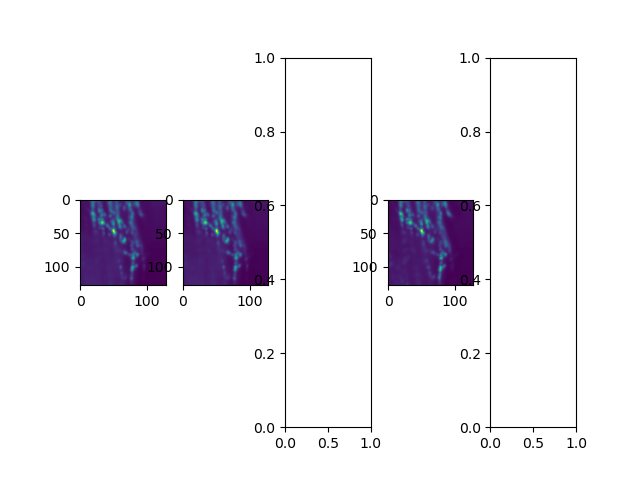

In [7]:
%matplotlib widget
denoiser = NLMDenoising(testing=True)
pixel_denoiser = pixel_NLMDenoising(testing=True)
patch_denoiser = patch_NLMDenoising(testing=True)

#img = (image - image.min()) / image.max()
img = image[0:1,:,:]
#img = np.ones((1,500,500)).astype(np.float32)

patch_size = 40
patch_distance = 40
sigma = 200
h = 0.8 * sigma

unt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
thr = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt = pixel_denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
cl = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1 Pro")
#cl2 = pixel_denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1 Pro")

#unt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
#thr_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
#pyt_px = pixel_denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")
#cl_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="OpenCL_Apple M1 Pro")

fig,axs = plt.subplots(1,5)
axs[0].imshow(img[0])

# non fast
axs[0].imshow(unt)
axs[1].imshow(thr)
#axs[2].imshow(pyt)
axs[3].imshow(cl)
#axs[4].imshow(cl2)
# fast
#axs[1].imshow(unt_fast[0])
#axs[2].imshow(thr_fast[0])
#axs[3].imshow(pyt_fast)
#axs[4].imshow(cl_fast[0])
# print(cl.shape)
# plt.imshow(cl)
plt.show()
